<a href="https://colab.research.google.com/github/sshashank99/traffic-sign/blob/master/Traffic_sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [29]:
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [30]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [31]:
X_train.shape


(34799, 32, 32, 3)

In [32]:
y_train.shape

(34799,)

2

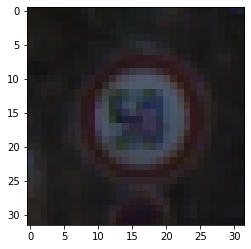

In [33]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

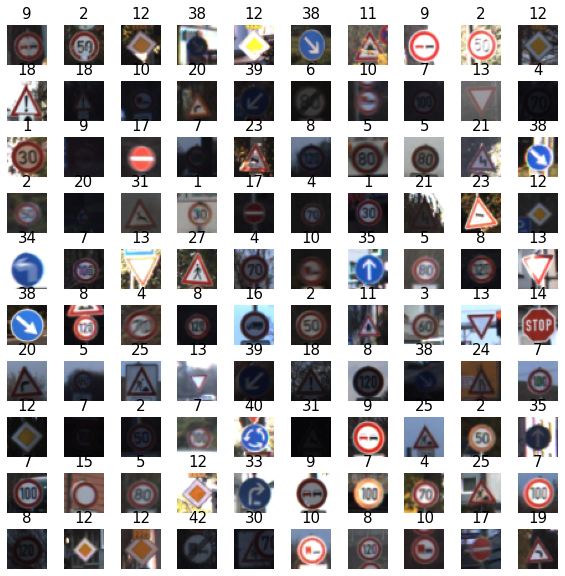

In [34]:
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [35]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [36]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [37]:
X_train_gray.shape



(34799, 32, 32, 1)

In [38]:
X_test_gray.shape

(12630, 32, 32, 1)

In [39]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [40]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [41]:
X_train_gray_norm

array([[[[ 0.05729167],
         [ 0.04166667],
         [ 0.04427083],
         ...,
         [-0.36458333],
         [-0.0078125 ],
         [ 0.06770833]],

        [[-0.01041667],
         [-0.00260417],
         [ 0.0078125 ],
         ...,
         [-0.02864583],
         [ 0.01822917],
         [ 0.02864583]],

        [[-0.04427083],
         [-0.03125   ],
         [-0.01822917],
         ...,
         [-0.0078125 ],
         [-0.01041667],
         [-0.00260417]],

        ...,

        [[-0.12239583],
         [-0.13020833],
         [-0.1171875 ],
         ...,
         [-0.046875  ],
         [-0.078125  ],
         [-0.11458333]],

        [[-0.13020833],
         [-0.13020833],
         [-0.1328125 ],
         ...,
         [-0.10677083],
         [-0.12760417],
         [-0.140625  ]],

        [[-0.08072917],
         [-0.09635417],
         [-0.10677083],
         ...,
         [-0.1328125 ],
         [-0.1328125 ],
         [-0.1328125 ]]],


       [[[-0.75520833],


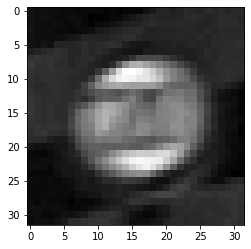

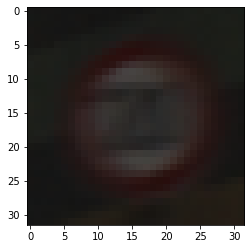

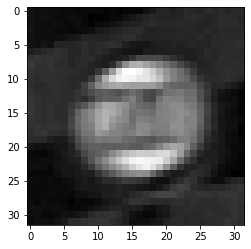

In [42]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

In [45]:
from tensorflow.keras import datasets, layers, models

CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))

CNN.add(layers.Dense(84, activation = 'relu'))

CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_6 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)              

In [46]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [47]:
history = CNN.fit(X_train_gray_norm,
                 y_train, 
                 batch_size = 500,
                 epochs = 50,
                 verbose = 1,
                 validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 14s 199ms/step - loss: 3.1801 - accuracy: 0.1658 - val_loss: 2.6392 - val_accuracy: 0.2728
Epoch 2/50
70/70 [==============================] - 14s 200ms/step - loss: 1.8626 - accuracy: 0.4739 - val_loss: 1.4975 - val_accuracy: 0.5737
Epoch 3/50
70/70 [==============================] - 14s 199ms/step - loss: 1.2132 - accuracy: 0.6402 - val_loss: 1.0400 - val_accuracy: 0.6941
Epoch 4/50
70/70 [==============================] - 14s 199ms/step - loss: 0.9159 - accuracy: 0.7296 - val_loss: 0.8821 - val_accuracy: 0.7313
Epoch 5/50
70/70 [==============================] - 14s 201ms/step - loss: 0.7513 - accuracy: 0.7783 - val_loss: 0.7437 - val_accuracy: 0.7823
Epoch 6/50
70/70 [==============================] - 14s 200ms/step - loss: 0.6395 - accuracy: 0.8133 - val_loss: 0.6411 - val_accuracy: 0.8138
Epoch 7/50
70/70 [==============================] - 14s 201ms/step - loss: 0.5600 - accuracy: 0.8358 - val_loss: 0.6305 - val_accuracy: 0.8200

In [48]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 3s 8ms/step - loss: 0.6077 - accuracy: 0.9089
Test Accuracy: 0.9088677763938904


In [49]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [50]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

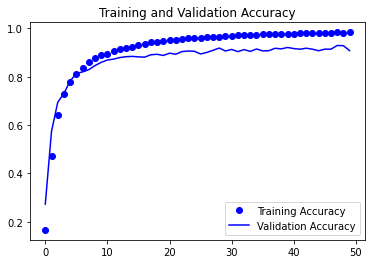

In [51]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

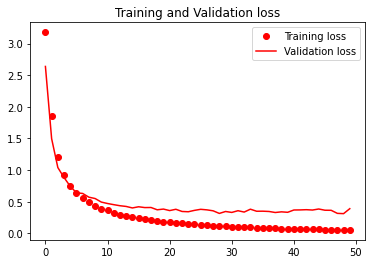

In [52]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [53]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


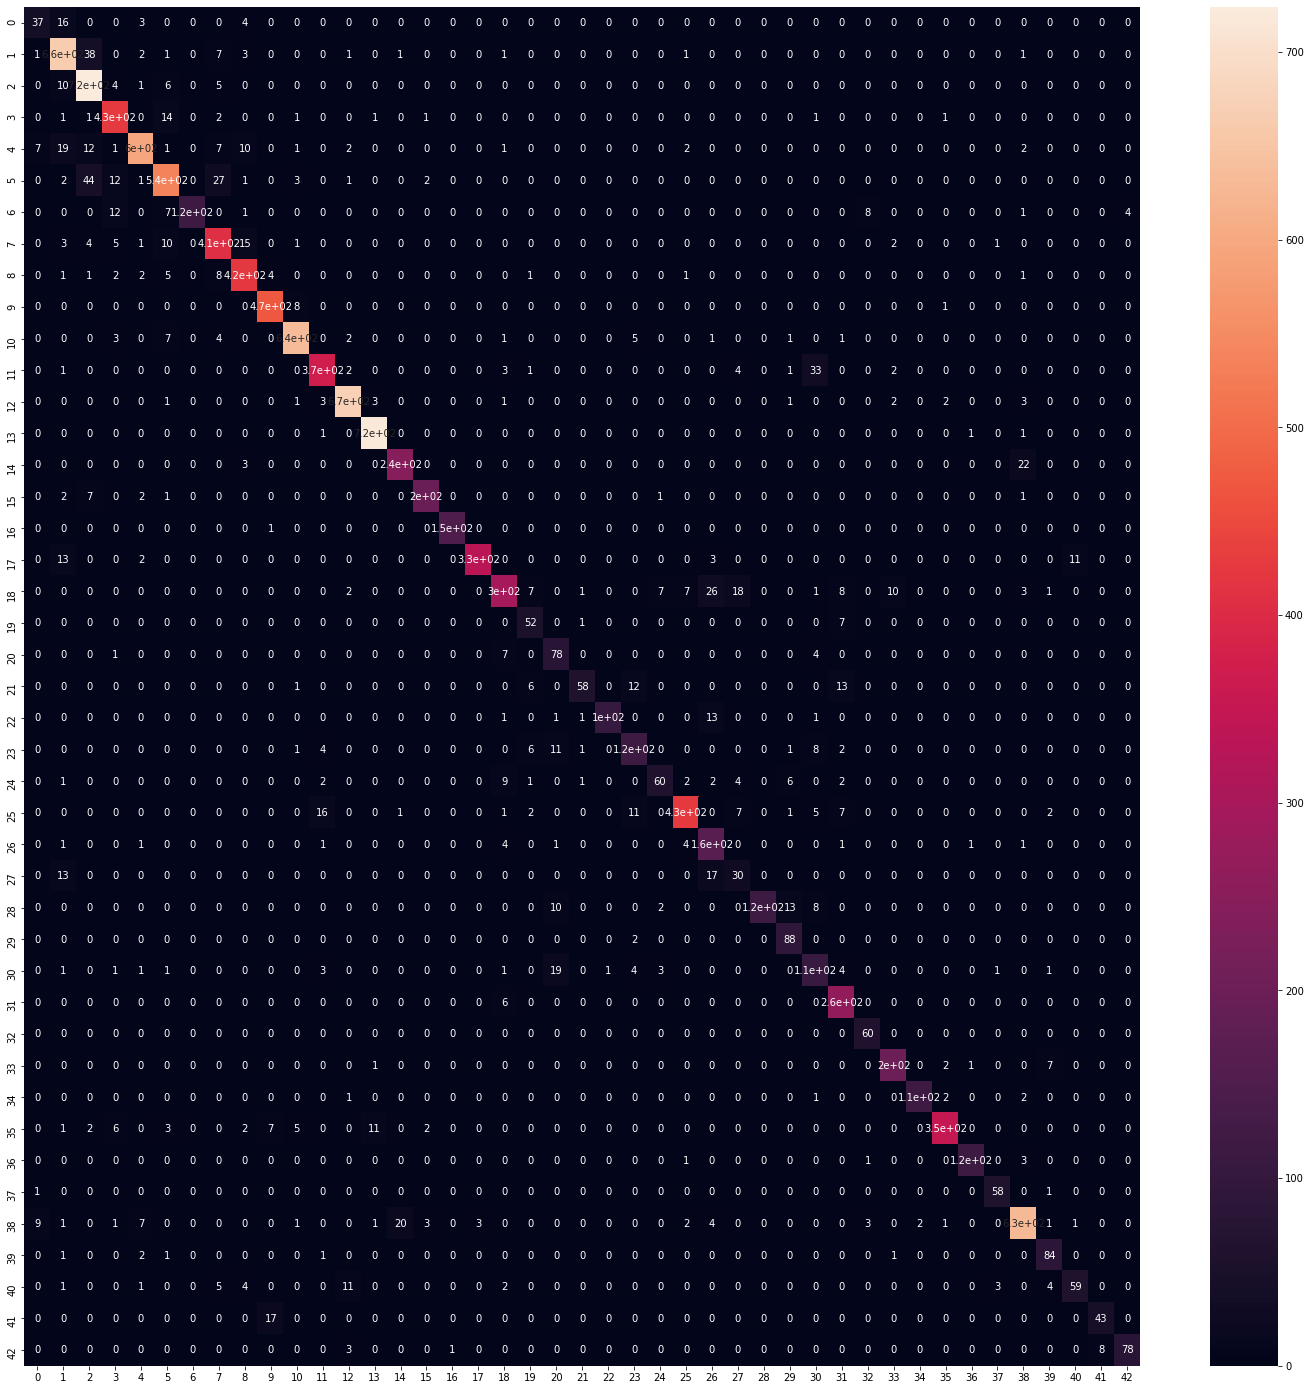

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

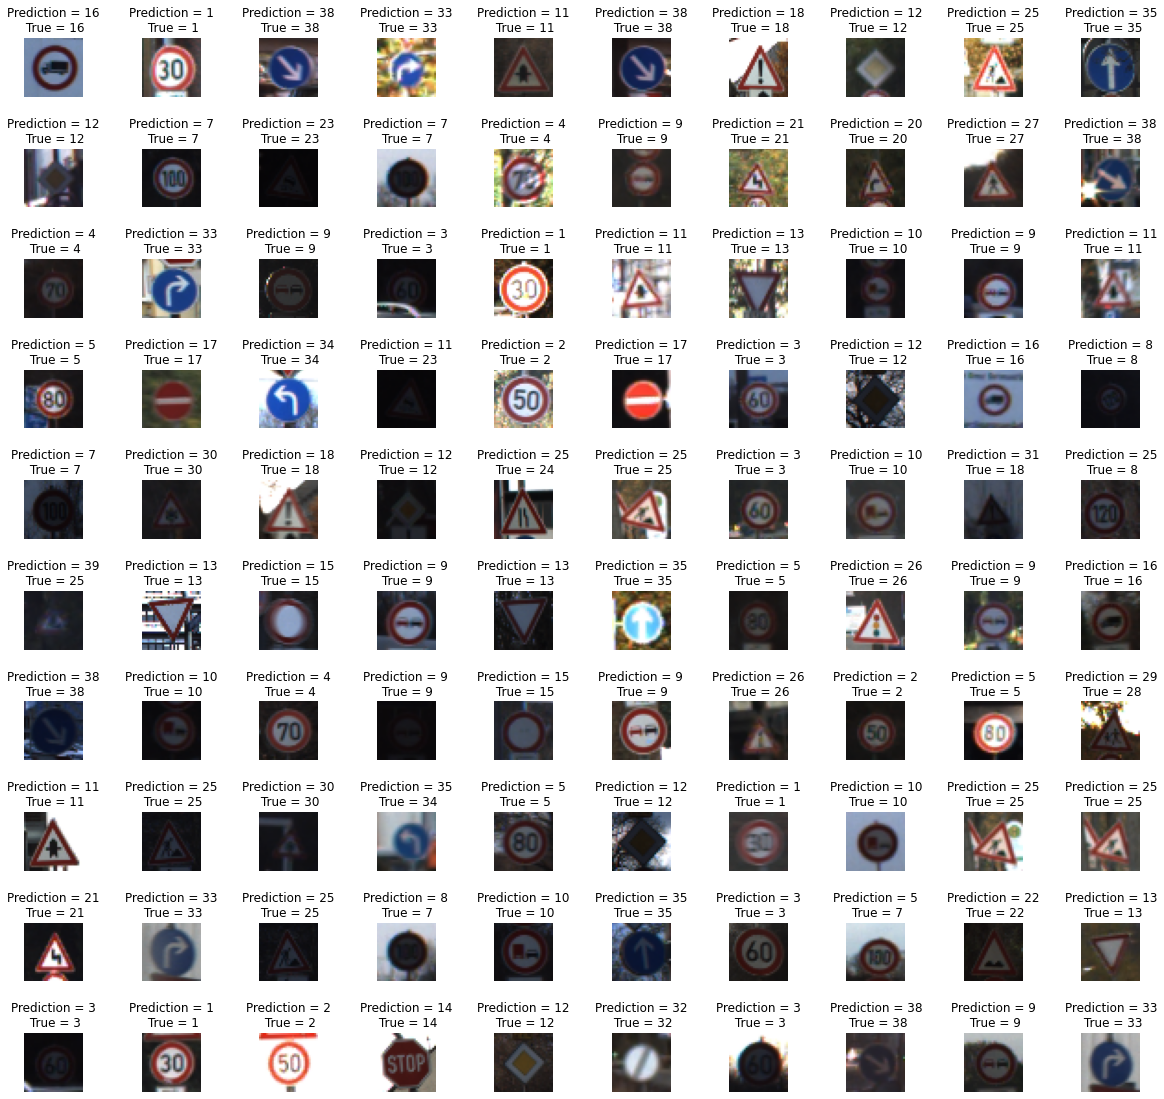

In [64]:
L = 10
W = 10

fig, axes = plt.subplots(L, W, figsize = (20, 20))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    